In [1]:
import pandas as pd
import plotly.io as pio
import plotly.express as px


# Config
pio.templates.default = "plotly_dark"

pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 50)
pd.set_option("plotting.backend", "plotly")

In [2]:
df = pd.read_excel("college_results.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Department          416 non-null    object 
 1   Course              416 non-null    object 
 2   Section             416 non-null    int64  
 3   Registerd_Students  416 non-null    int64  
 4   withdrawn_Students  416 non-null    int64  
 5   Continued_Students  414 non-null    float64
 6   Pass                416 non-null    int64  
 7   A+                  416 non-null    int64  
 8   A                   416 non-null    int64  
 9   B+                  416 non-null    int64  
 10  B                   416 non-null    int64  
 11  C+                  416 non-null    int64  
 12  C                   416 non-null    int64  
 13  D+                  416 non-null    int64  
 14  D                   416 non-null    int64  
 15  Fail                416 non-null    int64  
 16  DN      

In [4]:
df.describe()

,Section,Registerd_Students,withdrawn_Students,Continued_Students,Pass,A+,A,B+,B,C+,C,D+,D,Fail,DN,In-Progress
count,416.000000,416.000000,416.000000,414.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000
mean,52212.358173,13.543269,1.247596,12.355072,11.545673,1.992788,1.766827,1.942308,1.786058,1.334135,1.132212,0.713942,0.682692,0.584135,0.074519,0.060096
std,23641.720898,13.567788,2.342637,12.410728,11.960087,3.061214,2.606009,2.997435,2.624242,2.180171,1.857404,1.371798,1.390255,1.225291,0.376060,0.247871
min,10724.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31340.750000,3.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,44163.000000,5.000000,0.000000,5.000000,4.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,78540.250000,24.000000,1.000000,21.000000,20.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,84040.000000,57.000000,14.000000,53.000000,53.000000,27.000000,17.000000,18.000000,15.000000,13.000000,10.000000,11.000000,9.000000,7.000000,4.000000,2.000000


In [5]:
df.head(3)

,Department,Course,Section,Registerd_Students,withdrawn_Students,Continued_Students,Pass,A+,A,B+,B,C+,C,D+,D,Fail,DN,In-Progress,Instructor
0,Computer Science,CSC 111,21752,33,7,26.0,24,5,5,6,4,0,3,0,1,0,2,0,مراد مدني بوشناق
1,Computer Science,CSC 111,21839,38,3,35.0,34,9,6,6,4,4,2,1,2,1,0,0,مراد مدني بوشناق
2,Computer Science,CSC 111,21842,34,11,23.0,22,7,3,5,2,2,1,2,0,1,0,0,معاذ عبدالله بن سالم الخلف


In [6]:
# Average different sections studying under one instructor and one course


In [7]:
grades = ['A+', 'A', 'B+', 'B', 'C+', 'C', 'D+', 'D', 'Fail']
grade_to_score = {grade:len(grades)-i-1 for i, grade in enumerate(grades)}
grade_to_score["Fail"] = -1
grade_to_score

{'A+': 8,
 'A': 7,
 'B+': 6,
 'B': 5,
 'C+': 4,
 'C': 3,
 'D+': 2,
 'D': 1,
 'Fail': -1}

In [21]:
def series_to_score(series):
    return sum(grade_to_score[grade] * series[grade] for grade in grades) / series["Registerd_Students"]

def dataframe_to_score(dataframe):
    dataframe["Score"] = dataframe.apply(series_to_score, axis=1)
    return dataframe["Score"].agg("mean")
    
course_instructor_scores = df.groupby(["Instructor", "Course"]).apply(dataframe_to_score) 
course_instructor_scores = course_instructor_scores.reset_index()
course_instructor_scores["Score"] = course_instructor_scores[0]
del course_instructor_scores[0]

In [22]:
course_instructor_scores

,Instructor,Course,Score
0,أحمد زايد محمد أمام,IS 230,3.108718
1,أشرف الطيب القزدار,SWE 381,4.066957
2,أشرف الطيب القزدار,SWE 483,3.195652
3,أشرف الطيب القزدار,SWE 496,8.000000
4,أشرف الطيب القزدار,SWE 497,5.000000
5,أشرف الطيب القزدار,SWE 594,0.000000
6,أشرف الطيب القزدار,SWE 600,0.000000
7,احمد ابراهيم فهد الحماد,CEN 490,3.888889
8,احمد ابراهيم فهد الحماد,CEN 493,8.000000
9,احمد ابراهيم فهد الحماد,CEN 521,4.000000


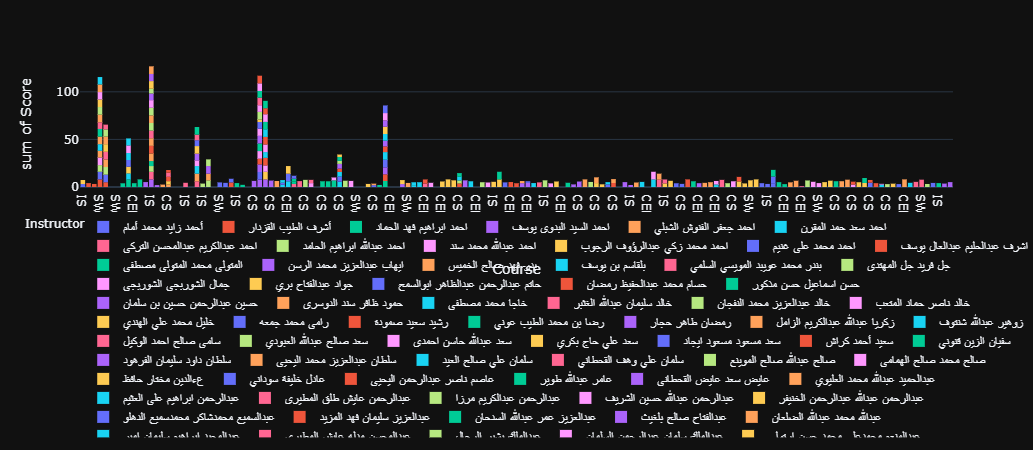

In [37]:
fig = px.histogram(course_instructor_scores, x="Course", y="Score", color="Instructor", hover_data=course_instructor_scores.columns)

fig.update_layout(
    legend=dict(x=-0.01, y=-0.2),
    legend_orientation="h"
)

fig.write_html("instructor_ranking.html")
fig.show()
